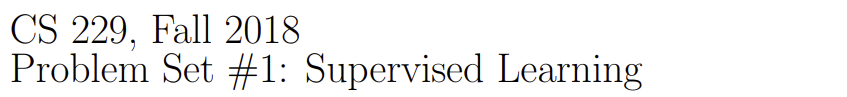

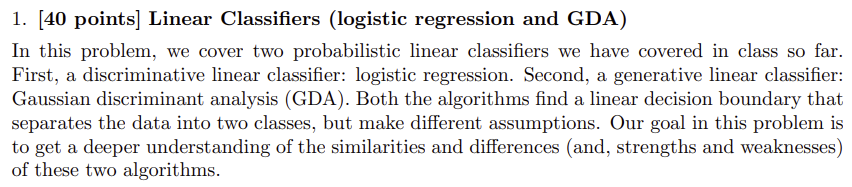

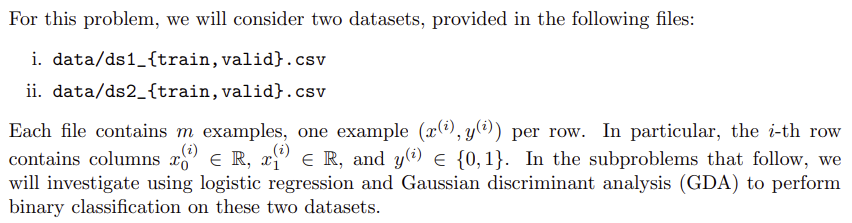

# **(a)**
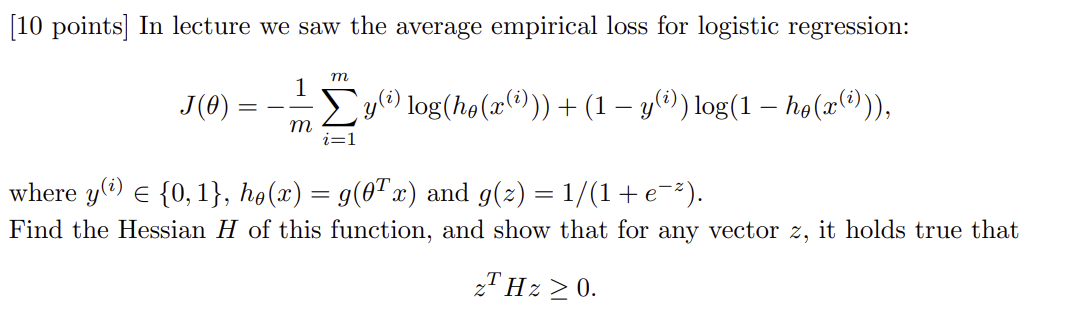

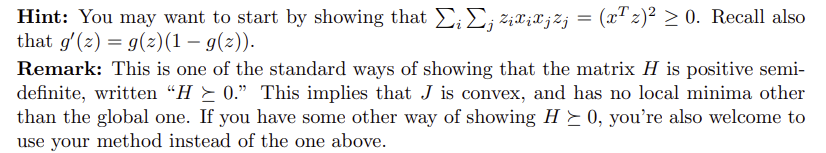

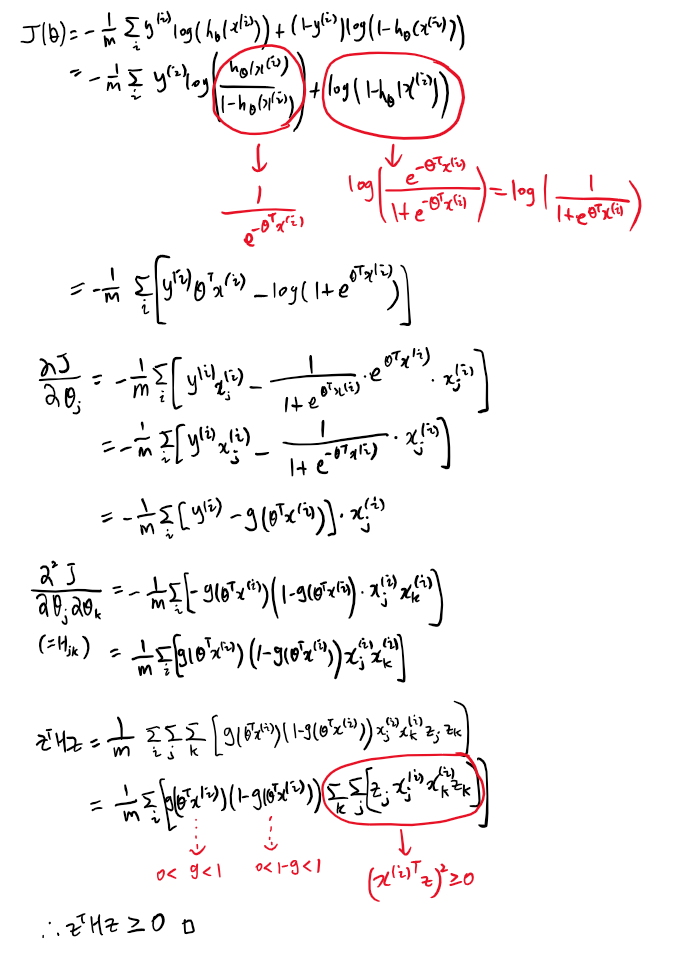

# **(b)**
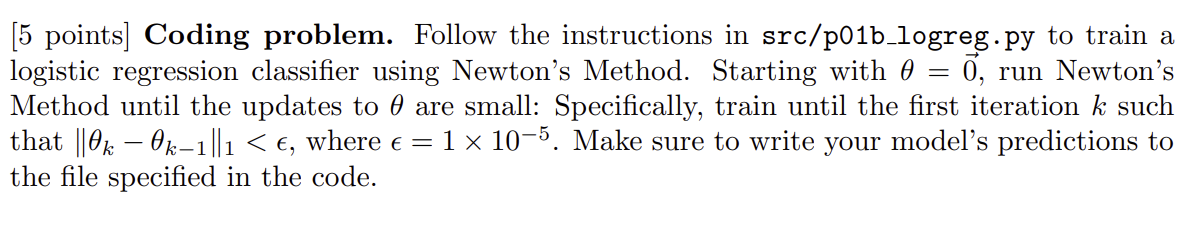

In [ ]:
import numpy as np
import src.util as util

from src.linear_model import LinearModel
# src 폴더 안에 linear_model.py 파일에서 LinearModel 의 class 를 가져온다.

In [ ]:
# data 폴더에서 csv 형식의 training, validation 데이터를 불러온다.
x_train, y_train = util.load_dataset('data/ds1_train.csv', add_intercept=True)
x_valid, y_valid = util.load_dataset('data/ds1_valid.csv', add_intercept=True)

In [ ]:
x_train.shape

(800, 3)

In [ ]:
# Newton's Method 목표: 데이터 분류를 위한 최선의 구분선을 찾는다.
# 어떻게?: 함수 f 의 접선이 f = 0 일 때, 다시 함수 f 의 접선을 긋는 행위를 반복적으로 하여 접점이 f = 0 에 가까워지게 한다.
# f = 0 의 점은 최적해에 해당한다.

In [ ]:
# LinearModel 의 class 의 기능들을 바탕으로 새로운 LogisticRegression 의 class 를 생성한다.
class LogisticRegression(LinearModel):
    # fit 함수는 주어진 학습 데이터에 대한 최선의 구분선을 찾는다.
    # 정확하게는 최선의 구분선일 때, theta 를 찾는다.
    def fit(self, x, y):
        """
        Args:
            x: Training example inputs of shape (m, n)
            y: Training example labels of shape (m,)
        """
        
        m, n = x.shape
        if self.theta is None:
            self.theta = np.zeros((n,))  # initialize theta
        g = lambda z: 1 / (1 + np.exp(-z))  # sigmoid

        for _ in range(self.max_iter):
            h = g(x @ self.theta)  # (m,n) @ (n,) = (m,) (@: 행렬곱)
            gradient = 1/m * (x.T @ (h - y))  # the gradient of J(theta)
                                              # x.T @ (h - y) of shape (n,)
            hessian = 1/m * (x.T @ (np.expand_dims(h * (1-h), axis=-1) * x))  # the hessian of J(theta)
                                                                              # np.expand_dims(h * (1-h), axis=-1) of shape (m, 1)
                                                                              # np.expand_dims(h * (1-h), axis=-1) * x of shape (m, n)
                                                                              # x.T @ (np.expand_dims(h * (1-h), axis=-1) * x) of shape (n, n)
            new_theta = self.theta - (np.linalg.inv(hessian) @ gradient)  # np.linalg.inv: 역행렬 반환
            if np.linalg.norm(new_theta - self.theta, 1) < self.eps:  # np.linalg.norm: norm 반환
                self.theta = new_theta
                break
            self.theta = new_theta
    
    # predict 함수는 새로운 데이터(검증 데이터)에 대한 결과를 fit 함수에서 찾은 구분선으로 예측한다.
    def predict(self, x):
        """
        Args:
            x: Inputs of shape (m, n)
        """

        g = lambda z: 1 / (1 + np.exp(-z))  # sigmoid

        return g(x @ self.theta)

In [ ]:
# 객체 생성 clf(= classifier)
clf = LogisticRegression()

In [ ]:
clf.fit(x_train, y_train)

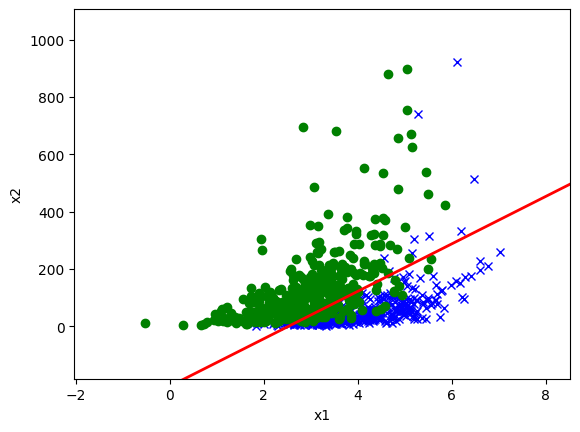

In [ ]:
# 학습 데이터로 찾은 최선의 theta 로 학습 데이터에 대한 구분선을 그린다.
util.plot(x_train, y_train, theta=clf.theta)

In [ ]:
print("최적의 Theta:", clf.theta)
print("학습 정확도:", np.mean(y_train == (clf.predict(x_train) >= 0.5)))

최적의 Theta: [-6.26018491  2.47707251 -0.0299125 ]
학습 정확도: 0.8825


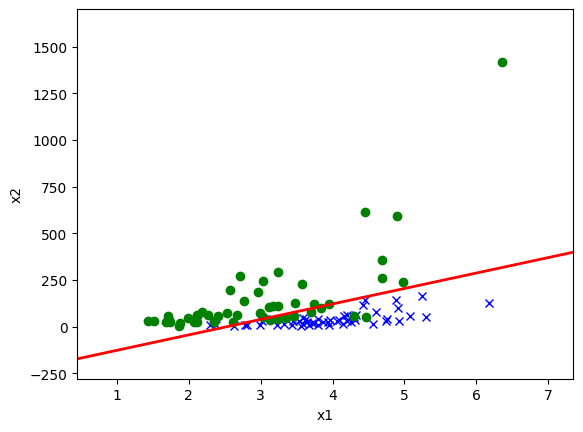

In [ ]:
# 학습 데이터로 찾은 최선의 theta 로 검증 데이터에 대한 구분선을 그린다.
util.plot(x_valid, y_valid, theta=clf.theta)

In [ ]:
print("검증 정확도:", np.mean(y_valid == (clf.predict(x_valid) >= 0.5)))

검증 정확도: 0.9


# **(c)**
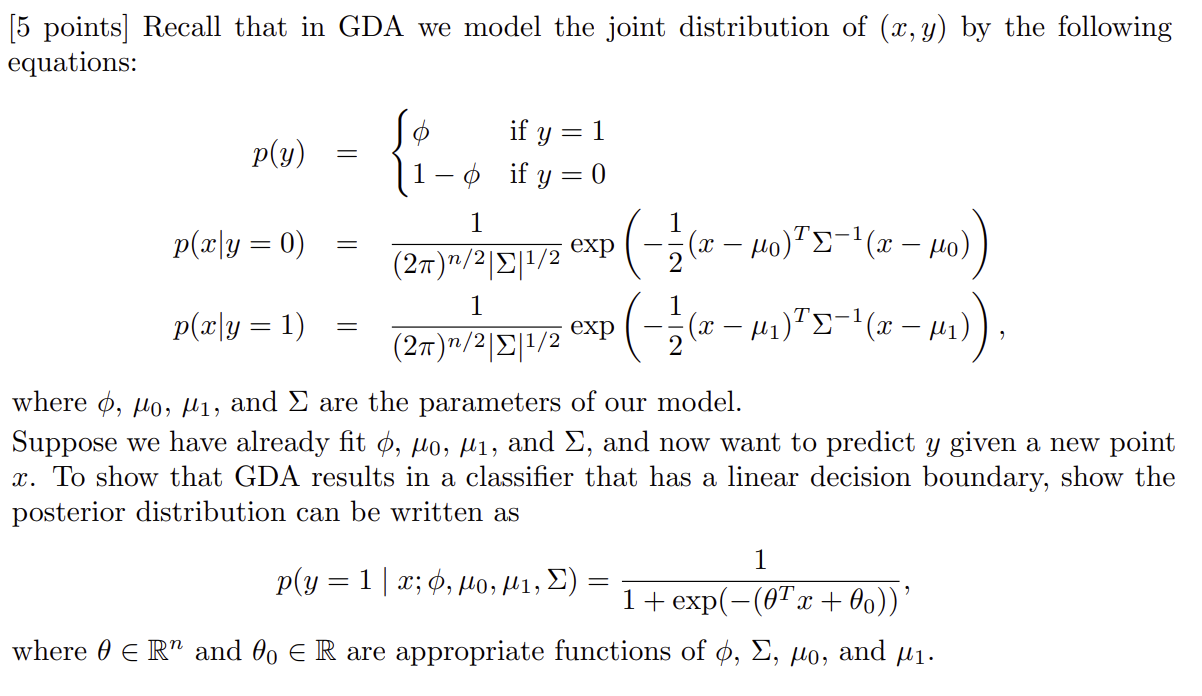

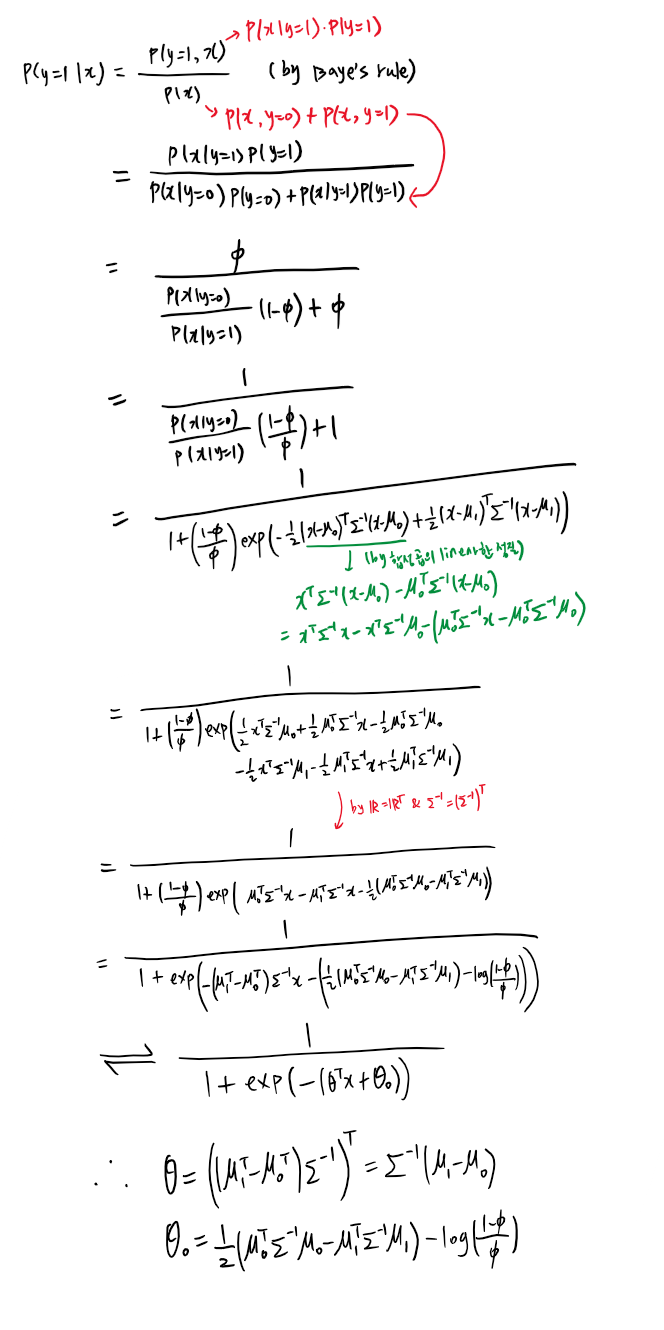

# **(d)**
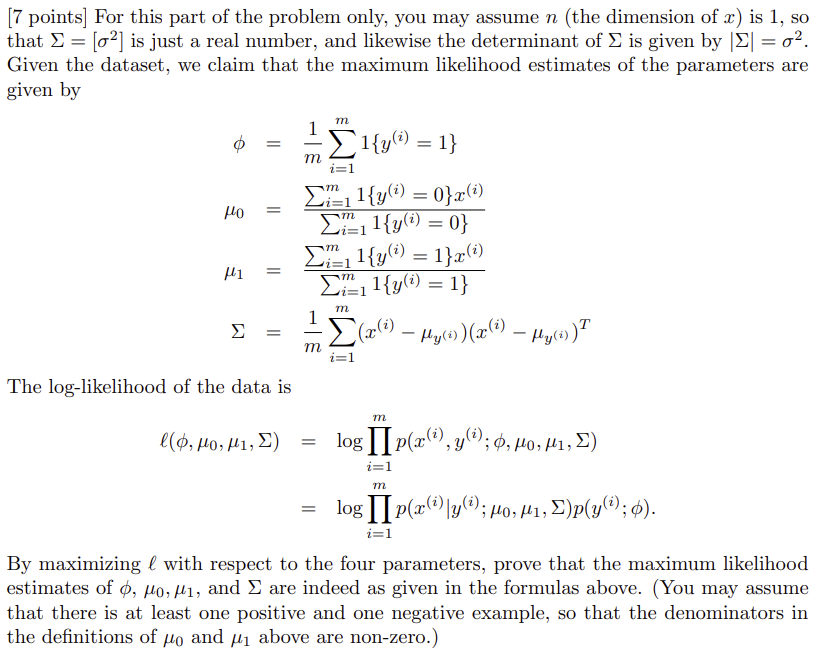

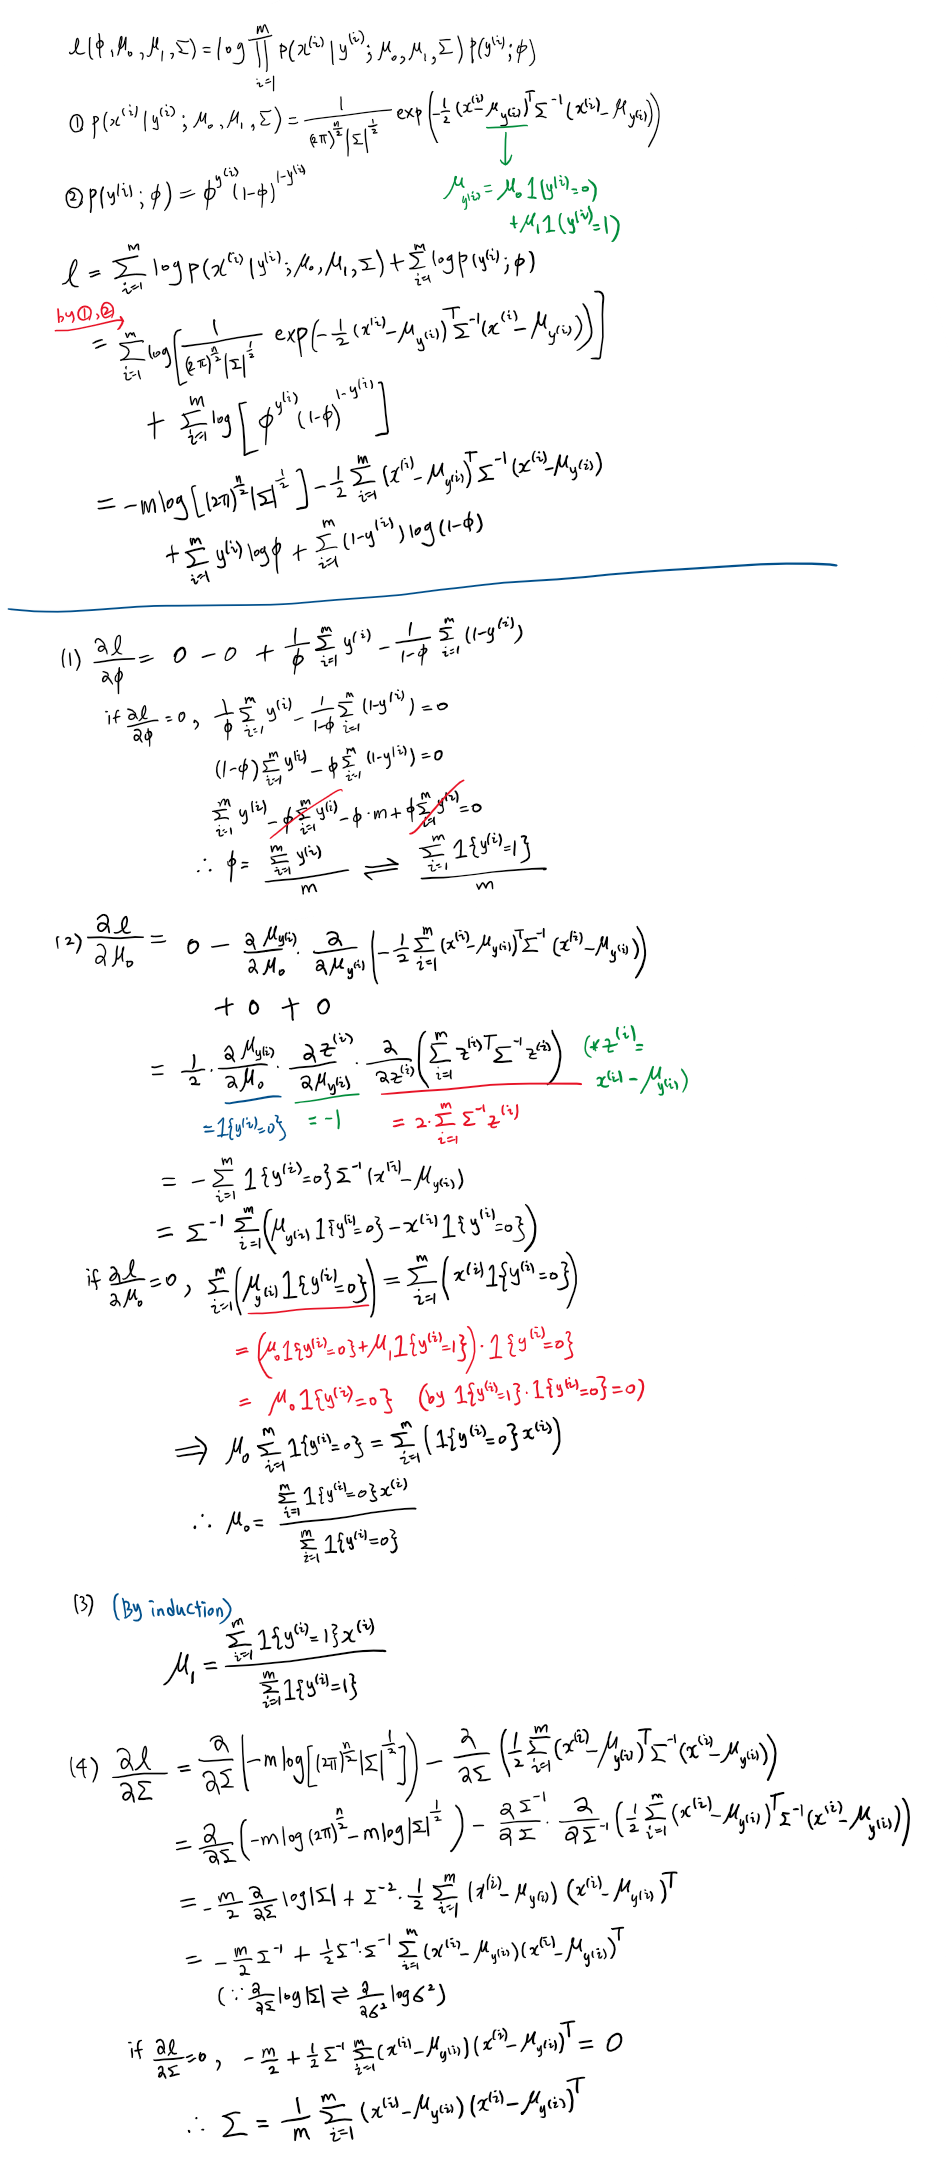

# **(e)**
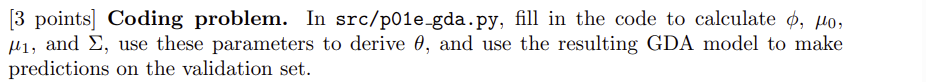

In [ ]:
import numpy as np
import src.util as util

from src.linear_model import LinearModel
# src 폴더 안에 linear_model.py 파일에서 LinearModel 의 class 를 가져온다.

In [ ]:
# data 폴더에서 csv 형식의 training, validation 데이터를 불러온다.
# add_intercept: linear classifier 에서 상수항을 고려하여, 데이터 1열에 1로 구성된 상수벡터를 추가
x_train, y_train = util.load_dataset('data/ds1_train.csv', add_intercept=False)
x_valid, y_valid = util.load_dataset('data/ds1_valid.csv', add_intercept=False)

In [ ]:
x_train.shape

(800, 2)

In [ ]:
# GDA(Gaussian Discriminant Analysis)도 Logistic regression 처럼 데이터를 분류하는 구분선(linear decision boundary)을 찾아낸다.

In [ ]:
# LinearModel 의 class 의 기능들을 바탕으로 새로운 GDA 의 class 를 생성한다.
class GDA(LinearModel):
    # fit 함수는 주어진 학습 데이터에 대한 최선의 GDA 모델을 구한다.
    # 정확하게는 최선의 GDA 모델일 때, theta 를 구한다.
    # 여기서 구한 theta 를 가지고 구분선을 그릴 수 있다.
    def fit(self, x, y):
        """
        Args:
            x: Training example inputs of shape (m, n)
            y: Training example labels of shape (m,)
        """

        # Find the maximum likelihood estimates
        m, n = x.shape
        phi = np.sum(y[y == 1]) / m
        mu_0 = np.sum(x[y == 0], axis=0) / np.sum(y == 0)  # mu_0 of shape (n,)
        mu_1 = np.sum(x[y == 1], axis=0) / np.sum(y == 1)  # mu_1 of shape (n,)
        mu = mu_0 * np.expand_dims(y == 0, axis=-1) + mu_1 * np.expand_dims(y == 1, axis=-1)  # mu of shape (m, n)
        sigma = 1/m * (x - mu).T @ (x - mu)  # sigma of shape (n, n)

        # Find the theta
        sigma_inv = np.linalg.inv(sigma)
        theta = sigma_inv @ (mu_1 - mu_0)  # theta of shape (n,)
        theta_0 = 1/2 * (mu_0.T @ sigma_inv @ mu_0 - mu_1.T @ sigma_inv @ mu_1) - np.log(1/phi - 1)  # theta_0 of shape (1,)
        self.theta = np.insert(theta, 0, theta_0)  # add theta_0 in the 0-th position of theta

    def predict(self, x):
        """
        Args:
            x: Inputs of shape (m, n)
        """
        
        return 1 / (1 + np.exp(-(util.add_intercept(x) @ self.theta)))

In [ ]:
# 객체 생성 clf(= classifier)
clf = GDA()

In [ ]:
clf.fit(x_train, y_train)

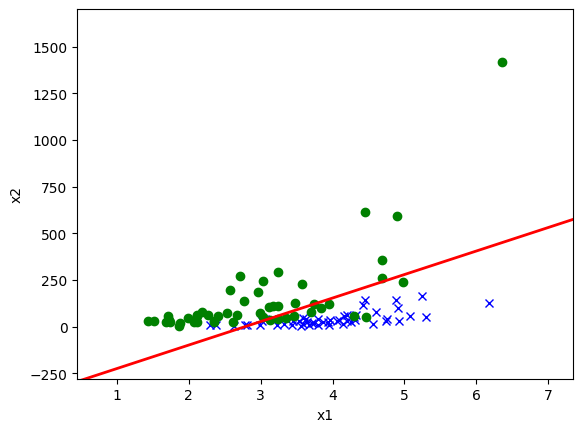

In [ ]:
# 학습 데이터로 찾은 최선의 theta 로 검증 데이터에 대한 구분선을 그린다.
util.plot(x_valid, y_valid, theta=clf.theta)

In [ ]:
print("최적의 Theta:", clf.theta)
print("학습 정확도:", np.mean(y_train == (clf.predict(x_train) >= 0.5)))
print("검증 정확도:", np.mean(y_valid == (clf.predict(x_valid) >= 0.5)))

최적의 Theta: [-6.17158405  2.22055506 -0.01763375]
학습 정확도: 0.86625
검증 정확도: 0.83


# **(f)**
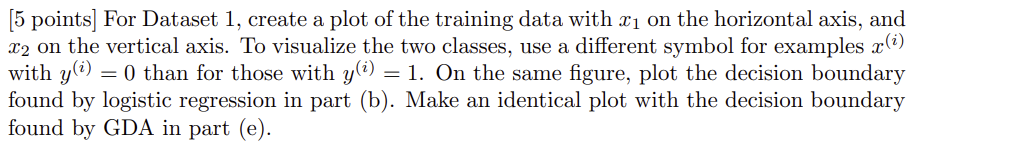

In [ ]:
import numpy as np
import src.util as util

from src.linear_model import LinearModel

In [ ]:
x_train, y_train = util.load_dataset('data/ds1_train.csv', add_intercept=False)

In [ ]:
class LogisticRegression(LinearModel):
    def fit(self, x, y):
        """
        Args:
            x: Training example inputs of shape (m, n)
            y: Training example labels of shape (m,)
        """
        
        m, n = x.shape
        if self.theta is None:
            self.theta = np.zeros((n,))
        g = lambda z: 1 / (1 + np.exp(-z))

        for _ in range(self.max_iter):
            h = g(x @ self.theta)
            gradient = 1/m * (x.T @ (h - y))
            hessian = 1/m * (x.T @ (np.expand_dims(h * (1-h), axis=-1) * x))
            new_theta = self.theta - (np.linalg.inv(hessian) @ gradient)
            if np.linalg.norm(new_theta - self.theta, 1) < self.eps:
                self.theta = new_theta
                break
            self.theta = new_theta
    
    def predict(self, x):
        """
        Args:
            x: Inputs of shape (m, n)
        """

        g = lambda z: 1 / (1 + np.exp(-z))

        return g(x @ self.theta)

In [ ]:
lr = LogisticRegression()
lr.fit(util.add_intercept(x_train), y_train)

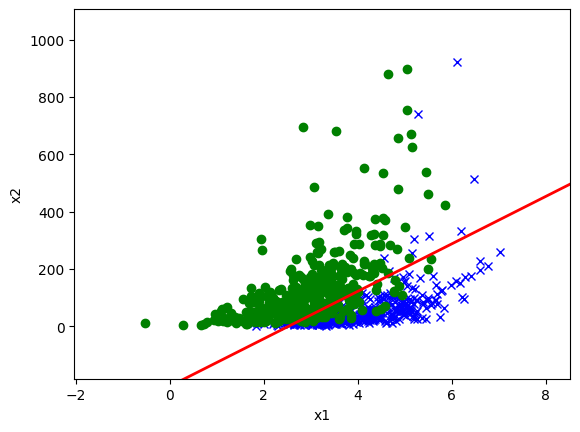

In [ ]:
util.plot(util.add_intercept(x_train), y_train, theta=lr.theta)

In [ ]:
class GDA(LinearModel):
    def fit(self, x, y):
        """
        Args:
            x: Training example inputs of shape (m, n)
            y: Training example labels of shape (m,)
        """

        m, n = x.shape
        phi = np.sum(y[y == 1]) / m
        mu_0 = np.sum(x[y == 0], axis=0) / np.sum(y == 0)
        mu_1 = np.sum(x[y == 1], axis=0) / np.sum(y == 1)
        mu = mu_0 * np.expand_dims(y == 0, axis=-1) + mu_1 * np.expand_dims(y == 1, axis=-1)
        sigma = 1/m * (x - mu).T @ (x - mu)

        sigma_inv = np.linalg.inv(sigma)
        theta = sigma_inv @ (mu_1 - mu_0)
        theta_0 = 1/2 * (mu_0.T @ sigma_inv @ mu_0 - mu_1.T @ sigma_inv @ mu_1) - np.log(1/phi - 1)
        self.theta = np.insert(theta, 0, theta_0)

    def predict(self, x):
        """
        Args:
            x: Inputs of shape (m, n)
        """
        
        return 1 / (1 + np.exp(-(util.add_intercept(x) @ self.theta)))

In [ ]:
gda = GDA()
gda.fit(x_train, y_train)

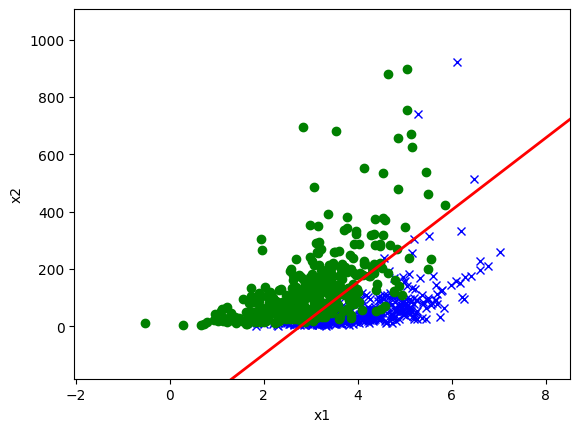

In [ ]:
util.plot(x_train, y_train, theta=gda.theta)

# **(g)**
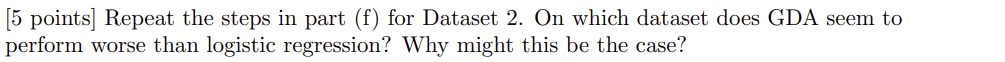

In [ ]:
x_train, y_train = util.load_dataset('data/ds2_train.csv', add_intercept=False)

In [ ]:
lr = LogisticRegression()
lr.fit(util.add_intercept(x_train), y_train)

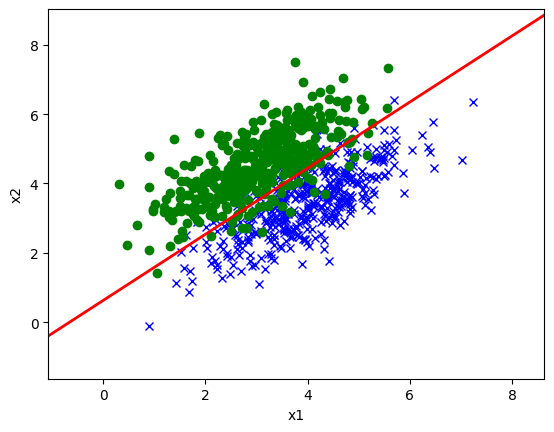

In [ ]:
util.plot(util.add_intercept(x_train), y_train, theta=lr.theta)

In [ ]:
gda = GDA()
gda.fit(x_train, y_train)

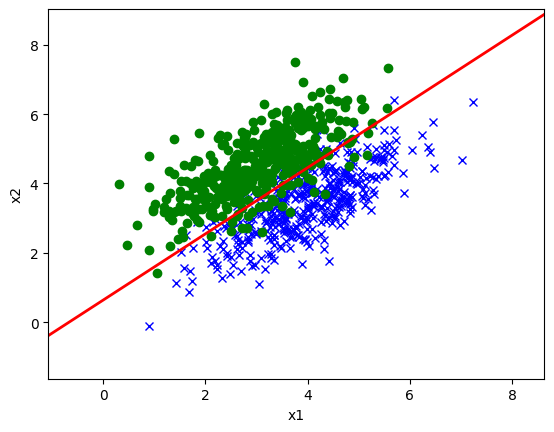

In [ ]:
util.plot(x_train, y_train, theta=gda.theta)

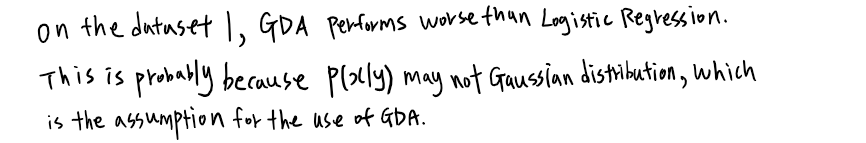

# **(h)**
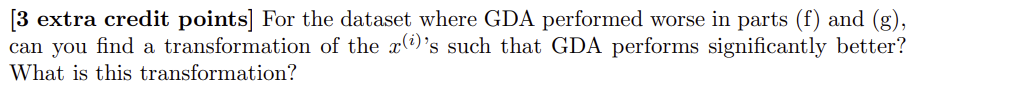

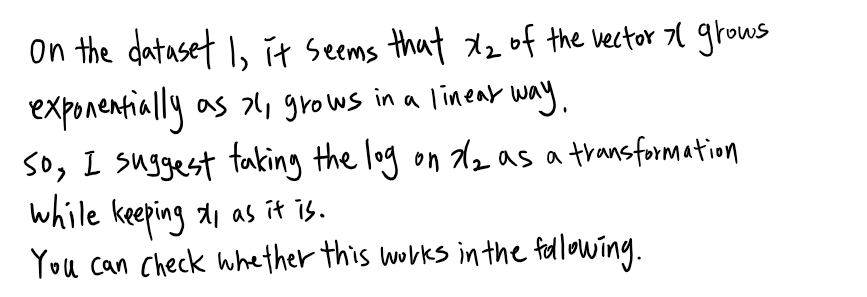

In [ ]:
x_train, y_train = util.load_dataset('data/ds1_train.csv', add_intercept=False)

In [ ]:
x_train[:,1] = np.log(x_train[:,1])  # take the log on the 2nd feature of x's

In [ ]:
lr = LogisticRegression()
lr.fit(util.add_intercept(x_train), y_train)

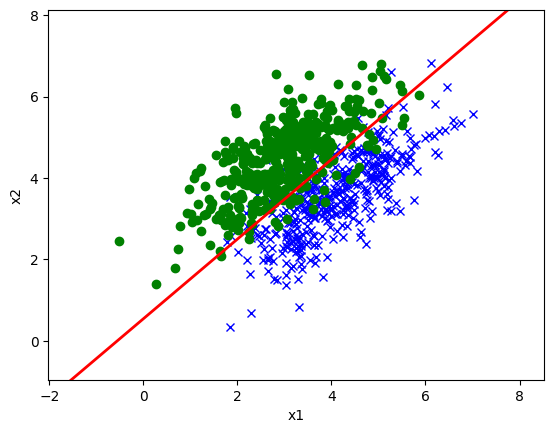

In [ ]:
util.plot(util.add_intercept(x_train), y_train, theta=lr.theta)

In [ ]:
print("LR's 학습 정확도:", np.mean(y_train == (lr.predict(util.add_intercept(x_train)) >= 0.5)))

LR's 학습 정확도: 0.91


In [ ]:
gda = GDA()
gda.fit(x_train, y_train)

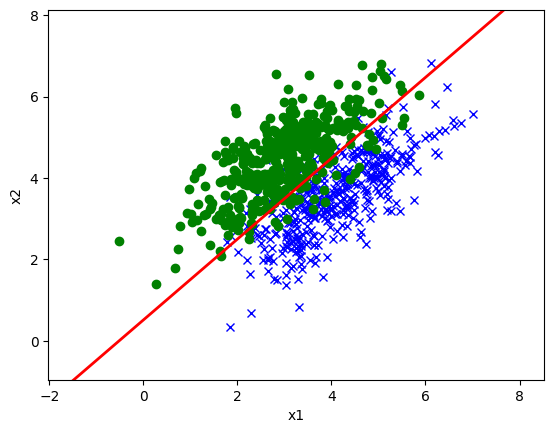

In [ ]:
util.plot(x_train, y_train, theta=gda.theta)

In [ ]:
print("GDA's 학습 정확도:", np.mean(y_train == (gda.predict(x_train) >= 0.5)))

GDA's 학습 정확도: 0.9125
